In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extended-data-main-data-pop/expanded_data_moods.csv
/kaggle/input/song-moods/data_moods.csv
/kaggle/input/spotify-music-data-to-identify-the-moods/data_moods.csv
/kaggle/input/song-moods-final/data_moods.csv
/kaggle/input/song-moods-2/data_mood_2.csv


# Final ML Project

In [2]:
import pandas as pd

# Load the dataset
data_moods = pd.read_csv('/kaggle/input/song-moods/data_moods.csv')

# Display the first few rows of the dataset
data_moods.head()

,name,artist,id,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,year,mood
0,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,68,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,1982,Happy
1,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,43,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,2007,Sad
2,9 Crimes,Damien Rice,5GZEeowhvSieFDiR8fQ2im,60,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,2006,Sad
3,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,2,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,1984,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,47IWLfIKOKhFnz1FUEUIkE,60,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,2004,Energetic


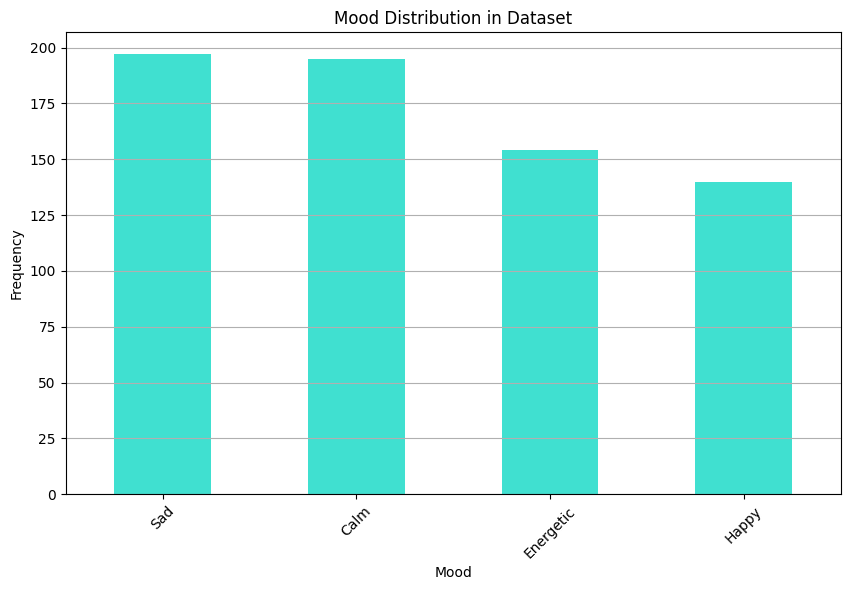

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/song-moods/data_moods.csv'  
data = pd.read_csv(file_path)

# Count the frequency of each mood in the dataset
mood_counts = data['mood'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
mood_counts.plot(kind='bar', color='turquoise')
plt.title('Mood Distribution in Dataset')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


name                0
artist              0
id                  0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
year                0
mood                0
dtype: int64


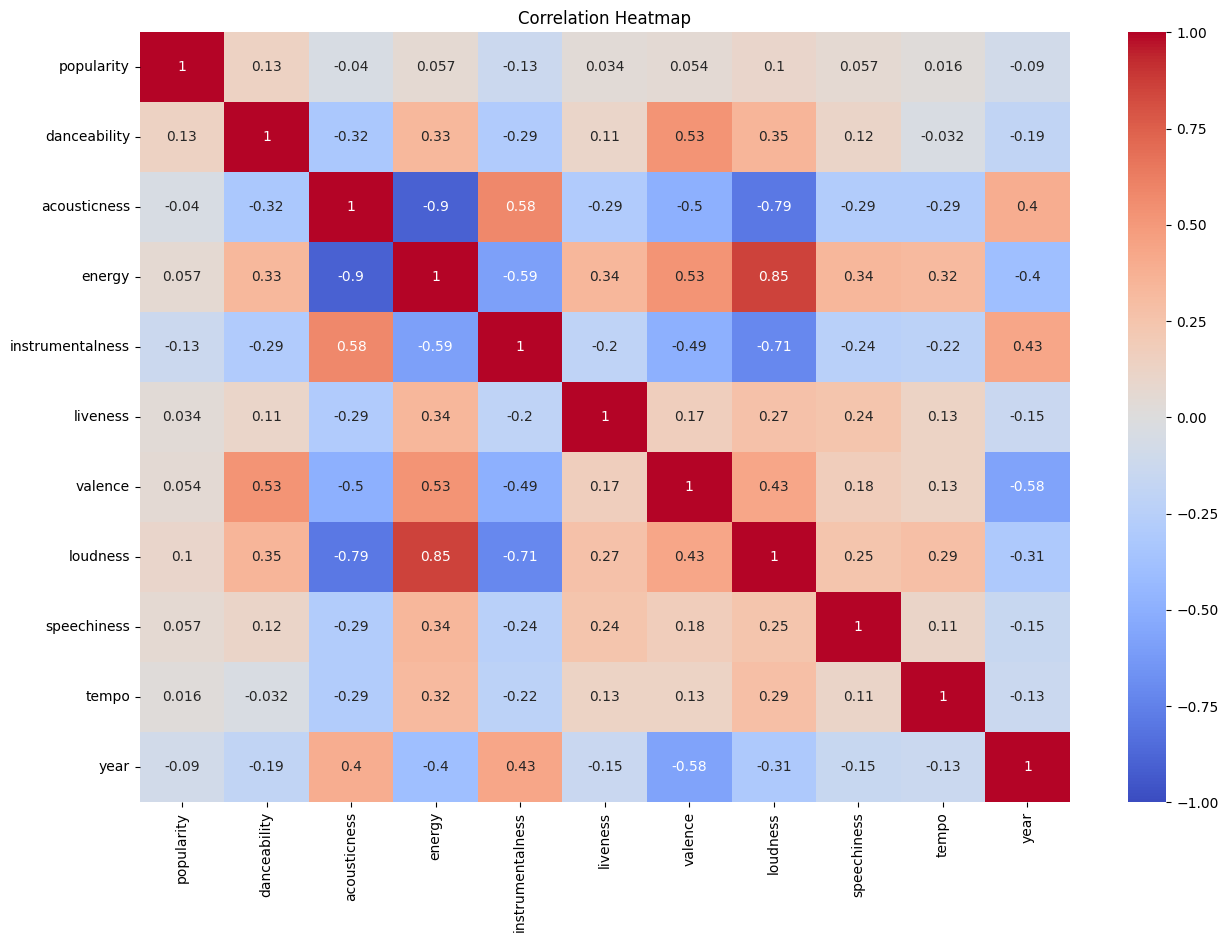

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/song-moods/data_moods.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data_moods.isnull().sum()
print(missing_values)

# Visualize the correlations between features using a heatmap
correlation_matrix = data_moods.drop(columns=['name', 'artist', 'id', 'mood','key']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

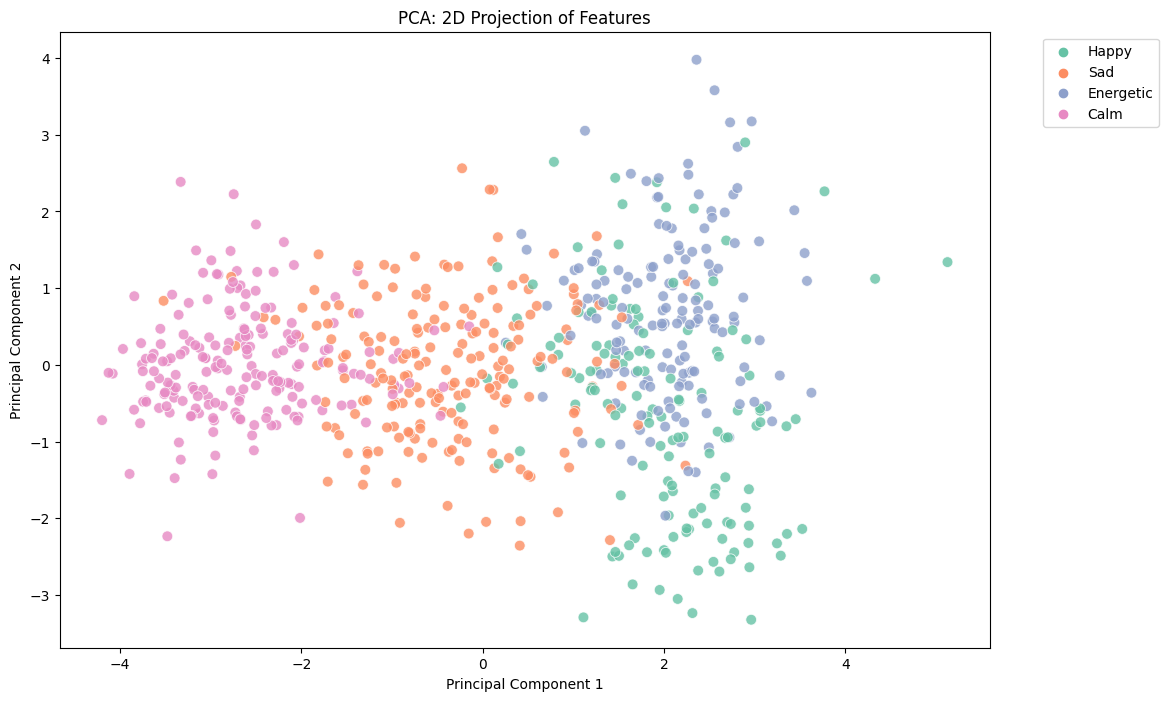

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = '/kaggle/input/song-moods/data_moods.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Extracting features and target variable 
features = data_moods.drop(columns=['name', 'artist', 'id', 'mood' ]) # no removal of KEY
target = data_moods['mood']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=target, palette='Set2', s=60, alpha=0.8)
plt.title("PCA: 2D Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


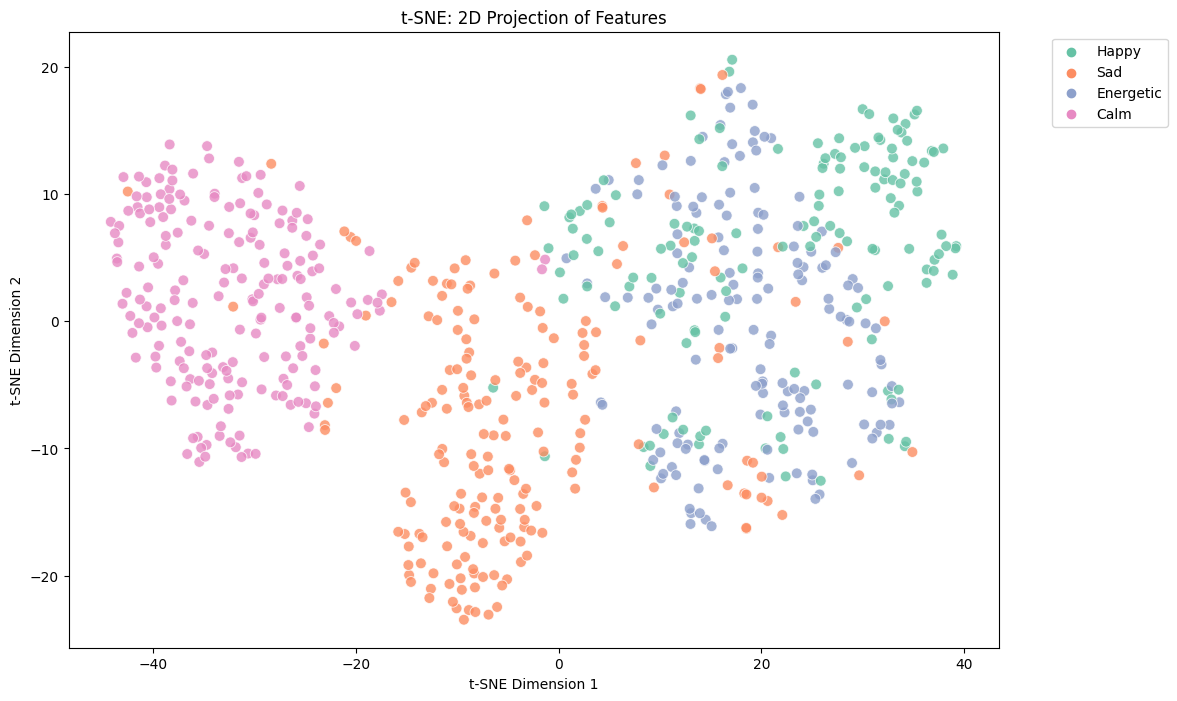

In [6]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=target, palette='Set2', s=60, alpha=0.8)
plt.title("t-SNE: 2D Projection of Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## CLASSIFIER 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load the dataset
data = pd.read_csv('/kaggle/input/song-moods/data_moods.csv')

# Step 1: Drop the specified columns
columns_to_drop = ['name', 'artist', 'id', 'key']
data = data.drop(columns=columns_to_drop)

# Step 3: Standardize all the numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 4: Label encode the 'mood' column
label_encoder = LabelEncoder()
data['mood_encoded'] = label_encoder.fit_transform(data['mood'])

# Extract features and target
X = data.drop(columns=['mood', 'mood_encoded'])
y = data['mood_encoded']

# Split data into training, evaluation, and testing sets (70-10-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGB Classifier": xgb.XGBClassifier(use_label_encoder=True, eval_metric="mlogloss", random_state=42),
    "SVM Linear": SVC(kernel="linear", random_state=42),
    "SVM Polynomial": SVC(kernel="poly", random_state=42),
    "SVM RBF": SVC(kernel="rbf", random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the evaluation set
    y_pred = model.predict(X_test)
    
    # Record the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

results_df = pd.DataFrame(results).T
results_df



,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.848921,0.862282,0.848921,0.849316
SGD Classifier,0.741007,0.754954,0.741007,0.735459
Gaussian Naive Bayes,0.812950,0.828507,0.812950,0.812228
Decision Tree,0.762590,0.763693,0.762590,0.760828
Random Forest,0.848921,0.855832,0.848921,0.849300
XGB Classifier,0.834532,0.835212,0.834532,0.832222
SVM Linear,0.841727,0.854668,0.841727,0.841910
SVM Polynomial,0.834532,0.846009,0.834532,0.833596
SVM RBF,0.841727,0.847429,0.841727,0.839629
KNN,0.827338,0.845271,0.827338,0.824727


### Hyperparameter Tuning

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':  ['sqrt']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters from grid search
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

# Initialize the Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the model
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate the metrics
accuracy_tuned_rf = accuracy_score(y_test, y_pred_rf)
precision_tuned_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_tuned_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_tuned_rf = f1_score(y_test, y_pred_rf, average="weighted")

accuracy_tuned_rf, precision_tuned_rf, recall_tuned_rf, f1_tuned_rf

(0.841726618705036, 0.8450606483959838, 0.841726618705036, 0.8419724435505359)

In [9]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGB Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train and evaluate the XGB Classifier with optimized hyperparameters
optimized_params = {
    'colsample_bytree': 0.9,
    'gamma': 0.1,
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'use_label_encoder': False,
    'eval_metric': "mlogloss",
    'random_state': 42
}

xgb_optimized = xgb.XGBClassifier(**optimized_params)
xgb_optimized.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = xgb_optimized.predict(X_test)

# Calculate accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
# Calculate precision and recall
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_score_optimized = f1_score(y_test, y_pred_optimized, average='weighted')
accuracy_optimized, precision_optimized, recall_optimized, f1_score_optimized

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


(0.841726618705036, 0.8435528500276702, 0.841726618705036, 0.8406865074520768)

In [10]:
# Set up the hyperparameter grid for SVM with polynomial kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'coef0': [0, 1, 2, 3],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM with polynomial kernel
svm_poly = SVC(kernel="poly", random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_params

{'C': 1, 'coef0': 2, 'degree': 2, 'gamma': 'scale'}

In [11]:
# Train the Decision Tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=15,
    splitter='random',
    random_state=42
)

best_dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_dt_classifier.predict(X_test)

# Compute the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average="weighted")
recall_best = recall_score(y_test, y_pred_best, average="weighted")
f1_best = f1_score(y_test, y_pred_best, average="weighted")

accuracy_best, precision_best, recall_best, f1_best

(0.8129496402877698,
 0.8198675417790902,
 0.8129496402877698,
 0.8106016142700683)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define hyperparameters grid
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],
}

sgd = SGDClassifier(random_state=42, max_iter=1000)
grid_search = GridSearchCV(sgd, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

{'alpha': 0.001,
 'eta0': 0.1,
 'learning_rate': 'adaptive',
 'loss': 'modified_huber',
 'penalty': 'elasticnet'}

In [13]:
#After Midsem Did ANN and KNN

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your dataset is already loaded and preprocessed (X_train, y_train, X_eval, y_eval, X_test, y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).long()
X_eval_tensor = torch.tensor(X_eval.values).float()
y_eval_tensor = torch.tensor(y_eval.values).long()
X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).long()

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class ANN(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.network(x)

# Model initialization
model = ANN(input_size=X_train.shape[1], output_size=len(y.unique()))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate

# Implement learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

# Training the model
for epoch in range(1000):
    for data, targets in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

    # Optionally print the loss
    # print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    correct = (y_pred.argmax(1) == y_test_tensor).type(torch.float).sum().item()
    test_acc = correct / y_test_tensor.size(0)

print('\nTest accuracy:', test_acc)
print("Number Of Correct Prediction : ", correct)


Test accuracy: 0.8201438848920863
Number Of Correct Prediction :  114.0


## Recommender System

#### Data Population and Encoding Mood

In [14]:
#data population and encoding moood label

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier

# Load the datasets
data = pd.read_csv('/kaggle/input/song-moods/data_moods.csv')
data_mood_2 = pd.read_csv('/kaggle/input/song-moods-2/data_mood_2.csv')

# Data preprocessing
# Drop specified columns
columns_to_drop = ['name', 'artist', 'id', 'key']
data = data.drop(columns=columns_to_drop)

# Standardize numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Label encode the 'mood' column
label_encoder = LabelEncoder()
data['mood_encoded'] = label_encoder.fit_transform(data['mood'])

# Extract features and target
X = data.drop(columns=['mood', 'mood_encoded'])
y = data['mood_encoded']

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X, y)

# Preprocess data_mood_2 similarly (except for mood encoding)
data_mood_2 = data_mood_2.drop(columns=columns_to_drop)
data_mood_2[numerical_cols] = scaler.transform(data_mood_2[numerical_cols])

# Predict the moods
mood_predictions = xgb_model.predict(data_mood_2)
mood_predictions_decoded = label_encoder.inverse_transform(mood_predictions)

# Add a new column for mood predictions
data_mood_2['mood'] = mood_predictions_decoded

# Save the updated dataframe to a new CSV file
data_mood_2.to_csv('/kaggle/working/data_mood_2_with_predictions.csv', index=False)


In [15]:
import pandas as pd
import numpy as np 

# Load the dataset
data_moods = pd.read_csv('/kaggle/input/song-moods-final/data_moods.csv')

# Display the first few rows of the dataset
data_moods.head()

,name,artist,id,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,year,mood
0,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,68,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,1982,Happy
1,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,43,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,2007,Sad
2,9 Crimes,Damien Rice,5GZEeowhvSieFDiR8fQ2im,60,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,2006,Sad
3,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,2,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,1984,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,47IWLfIKOKhFnz1FUEUIkE,60,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,2004,Energetic


In [16]:
from sklearn import metrics
dict1 = {}

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier

# Load the datasets
data = pd.read_csv('/kaggle/input/song-moods/data_moods.csv')
data_mood_2 = pd.read_csv('/kaggle/input/song-moods-2/data_mood_2.csv')

# Data preprocessing
# Drop specified columns
columns_to_drop = ['name', 'artist', 'id', 'key']
data = data.drop(columns=columns_to_drop)

# Standardize numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Label encode the 'mood' column
label_encoder = LabelEncoder()
data['mood_encoded'] = label_encoder.fit_transform(data['mood'])

# Extract features and target
X = data.drop(columns=['mood', 'mood_encoded'])
y = data['mood_encoded']

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X, y)

# Preprocess data_mood_2 similarly (except for mood encoding)
data_mood_2 = data_mood_2.drop(columns=columns_to_drop)
data_mood_2[numerical_cols] = scaler.transform(data_mood_2[numerical_cols])

# Predict the moods
mood_predictions = xgb_model.predict(data_mood_2)
mood_predictions_decoded = label_encoder.inverse_transform(mood_predictions)

# Add a new column for mood predictions
data_mood_2['mood'] = mood_predictions_decoded

# Save the updated dataframe to a new CSV file
data_mood_2.to_csv('/kaggle/working/data_mood_2_with_predictions.csv', index=False)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

In [19]:
features = ['popularity', 'danceability', 'acousticness', 'energy',
            'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness',
            'tempo', 'year']

metadata_cols = ['year', 'name',  'artist', 'mood']

In [20]:
def input_preprocessor(song_list, dataset):
   
    song_vectors = []
    
    for song in song_list:
        try:
            song_data = dataset[(dataset['name'] == song['name']) & 
                                (dataset['year'] == song['year'])].iloc[0]
       
        except IndexError:
            song_data = None
            
        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue
            
        song_vectors.append(song_data[features].values)  

    return np.mean(np.array(list(song_vectors)), axis=0)

In [21]:
def Music_Recommender(song_list, dataset, n_songs=10):

#     groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, dataset)
    
#     song_center = song_center.reshape(1, -1)
    
    
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    print(scaled_song_center)
    center_mood = xgb_model.predict(scaled_song_center)
    mood_string = label_encoder.inverse_transform(center_mood)[0]
    print(mood_string)
    
    dataset = dataset[dataset['mood'] == mood_string]

    scaled_data = scaler.transform(dataset[features])
    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    
    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = dataset.iloc[index]
  
    
    return rec_output[metadata_cols]

In [22]:
results =Music_Recommender([{'name': "All Jacked Up", 'year': 2005}, {'name' : 'Lighters Up', 'year' : 2005}, {'name' : 'Take the Time', 'year' : 1992}],data_moods)
results

[[ 0.25178567 -0.29098346 -0.93822972  1.08701203 -0.84986594 -0.33774234
   1.08108242  0.66089143  3.89387694  0.57020192 -0.9529511 ]]
Energetic


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,year,name,artist,mood
1294,1998,Johnny Jump Up/Morrison's Jig,Gaelic Storm,Energetic
696,1992,Session,The Offspring,Energetic
1835,2003,Lying from You,Linkin Park,Energetic
424,2000,Points of Authority,Linkin Park,Energetic
1942,2004,Let It Bleed,The Used,Energetic
1803,2003,The Crowing,Coheed and Cambria,Energetic
1596,2001,Dead Cell,Papa Roach,Energetic
1903,2004,Still Running,Chevelle,Energetic
581,2008,Toxic,A Static Lullaby,Energetic
104,2005,Come Out And Play (Keep ‘Em Separated),The Offspring,Energetic


In [23]:
results =Music_Recommender([{'name': "Archangel's Lullaby", 'year': 2006}, {'name' : 'Isonoe', 'year' : 2020}],data_moods)
results

[[-0.2403495  -1.68883755  1.30290434 -1.35598694  1.41117541 -0.43526112
  -0.7347203  -2.21446795 -0.28653027 -0.03312363  0.0945935 ]]
Calm


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,year,name,artist,mood
204,2020,Fête sous les étoiles,Biba Dupont,Calm
39,2020,Auburn Sky,Toledo Rains,Calm
588,2020,Tuesday,Annelie,Calm
460,2020,Sadness,Marynka,Calm
409,2019,Parabel,Matteo Myderwyk,Calm
513,2020,Strange Dreams,Ella van der Woude,Calm
158,2019,Eagle,Ansatz Der Maschine,Calm
296,2020,Klangfall - Piano Version,Joep Beving,Calm
441,2020,Rebuscano,Olivia Belli,Calm
1885,2003,Finding Nemo,Thomas Newman,Calm


In [24]:
results =Music_Recommender([{'name': 'California', 'year': 2003}, {'name' : 'Oiga Primo', 'year' : 1992}],data_moods)
results

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[ 0.02019265  1.50433882  0.44526727 -0.03277672 -0.85225491  0.36354795
   1.97153176  0.34228296  4.88717717  0.70695955 -1.22191525]]
Happy


,year,name,artist,mood
1021,1995,God Is Bigger,VeggieTales,Happy
2188,2006,Garza West,South Park Mexican,Happy
1486,1999,Mama Cumbia,Los Socios Del Ritmo,Happy
1295,1998,Crime Story,DMX,Happy
887,1993,Six Feet Deep,Geto Boys,Happy
1370,1998,Akickdoe!,C-Murder,Happy
1520,2000,Atomic Dog,George Clinton,Happy
1630,2001,El Espinazo Del Diablo,Los Tigres Del Norte,Happy
2120,2006,Ella Y Yo,Aventura,Happy
809,1993,Point The Finga,2Pac,Happy


In [25]:
# sad sad happy
results =Music_Recommender([{'name': "Archangel's Lullaby", 'year': 2006},{'name': 'California', 'year': 2003}, {'name' : 'Session', 'year':1992}],data_moods)
results

[[ 0.15046372 -0.45760952  0.34179044 -0.04033733 -0.08922171 -0.37200886
   0.21958755 -0.58696755  4.46550833  0.62189827 -0.98126311]]
Sad


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,year,name,artist,mood
1558,2000,Mary Go Round,Musiq Soulchild,Sad
1497,2000,Honey Molasses,Jill Scott,Sad
2146,2006,When It Was Me,Paula DeAnda,Sad
2227,2007,Suffocate,J. Holiday,Sad
669,2020,blue,Kamal.,Sad
748,1992,Jacob & Sons / Joseph's Coat,Andrew Lloyd Webber,Sad
1633,2001,El Niño Y La Boda,Los Tigres Del Norte,Sad
1236,1997,"I Love to Laugh - From ""Mary Poppins""/Soundtra...",Edwynn,Sad
1778,2002,Forget About the Boy,Sutton Foster,Sad
472,2017,She Kind of Looks Like You,AFTRHOURS,Sad
